## Halo mass fucntion:

2025-05-21 20:56:17.278267: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 20:56:17.281157: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-21 20:56:17.290430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747878977.305984 1293560 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747878977.310860 1293560 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747878977.323088 1293560 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

XiEmulator | 05/21/2025 08:56:20 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl


2025-05-21 20:56:20.242790: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


BaseEmulator | 05/21/2025 08:56:21 PM | INFO  |  Loading the hmf emulator from /home/qezlou/HD2/HETDEX/cosmo/data/HMF/train/hmf_emu_combined_inducing_500_latents_20_leave31.pkl


05/21/2025 08:56:21 PM Plotting omega0
/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")
05/21/2025 08:58:17 PM Plotting omegab
05/21/2025 09:00:07 PM Plotting hubble
05/21/2025 09:01:57 PM Plotting scalar_amp
05/21/2025 09:03:47 PM Plotting ns
05/21/2025 09:05:36 PM Plotting w0_fld
05/21/2025 09:07:26 PM Plotting wa_fld
05/21/2025 09:09:15 PM Plotting N_ur
05/21/2025 09:11:04 PM Plotting alpha_s
05/21/2025 09:12:54 PM Plotting m_nu


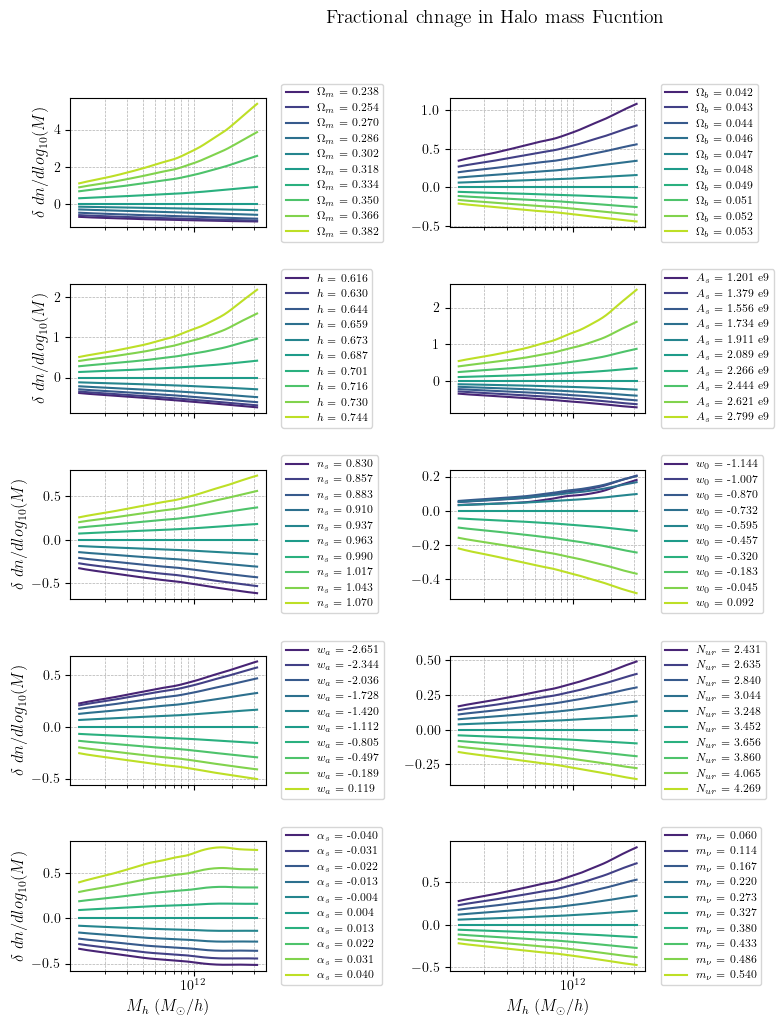

In [1]:
import importlib
from gal_goku import plot_gal
importlib.reload(plot_gal)


plt_gal = plot_gal.PlotGal(logging_level='INFO')
savefig_dir = '/home/qezlou/HD2/HETDEX/cosmo/pack_dev/test/'
plt_gal.hmf_cosmo_sensitivity(savefig_dir=savefig_dir)

In [4]:
from colossus.lss import peaks
from colossus.lss import bias
from colossus.cosmology import cosmology

M = 1E14
z = 0.0
cosmology.setCosmology('planck18')
nu = peaks.peakHeight(M, z)
b = bias.haloBiasFromNu(nu, model = 'sheth01')
b = bias.haloBias(M, model = 'tinker10', z = z, mdef = 'vir')


# Get current cosmology parameters and increase Omega_m by 10%
params = cosmology.getCurrent()
params.Om0 *= 1.6  # Increase Omega_m by 10%
# Convert params to a dictionary, update Om0, and set new cosmology
cosmology.setCurrent(params)

nu_mod = peaks.peakHeight(M, z)
b_mod = bias.haloBias(M, model='tinker10', z=z, mdef='vir')

print(f"Original bias: {b:.4f}")
print(f"Modified bias (Omega_m -20%): {b_mod:.4f}")
print(f"Bias ratio (modified/original): {b_mod / b:.4f}")
print(f"Bias ratio ^ 2 (modified/original): {(b_mod / b)**2:.4f}")


Original bias: 2.1506
Modified bias (Omega_m -20%): 1.6921
Bias ratio (modified/original): 0.7868
Bias ratio ^ 2 (modified/original): 0.6190


XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM | INFO  |  Loading the xi emulator from /home/qezlou/HD2/HETDEX/cosmo/data/xi_on_grid/train_less_massive/xi_emu_combined_inducing_500_latents_40_leave34.pkl
XiEmulator | 05/21/2025 12:02:59 PM

/home/qezlou/miniconda3/envs/py3.12/lib/python3.12/site-packages/mcfit/mcfit.py:182: UserWarning: input must be log-spaced
  warnings.warn("input must be log-spaced")


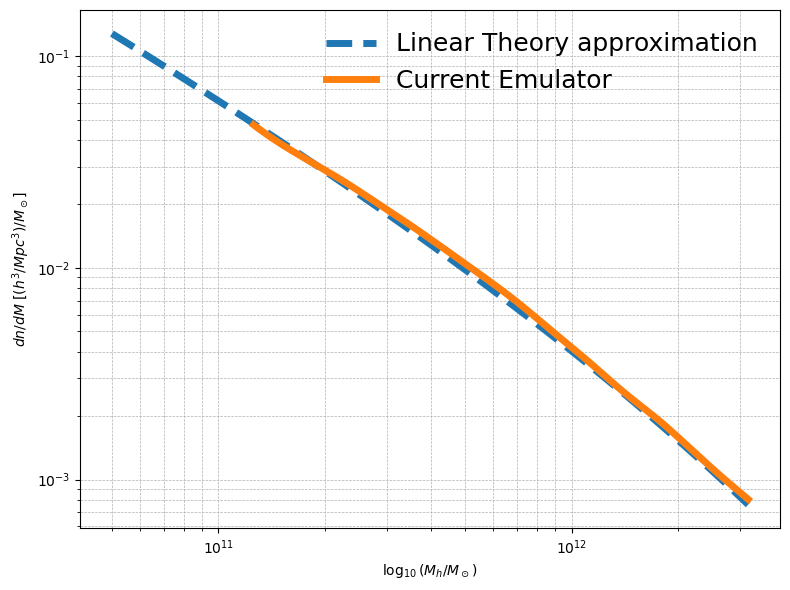

In [34]:
import importlib
from gal_goku import plot_gal
importlib.reload(plot_gal)


plt_gal = plot_gal.PlotGal(logging_level='INFO')
plt_gal.dndm_planck18()

/tmp/ipykernel_1369112/868573011.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mass = 4*np.pi * np.trapz(rho * r**2, r)


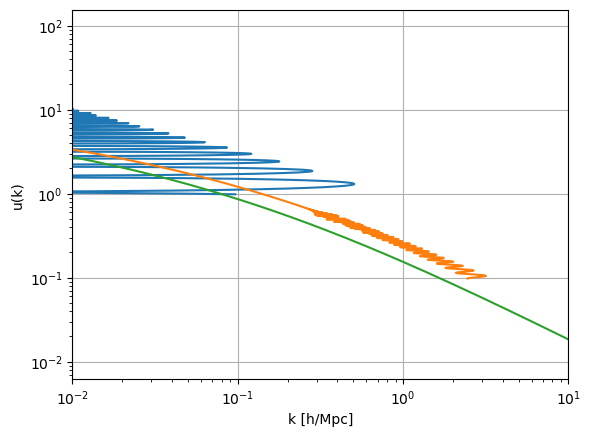

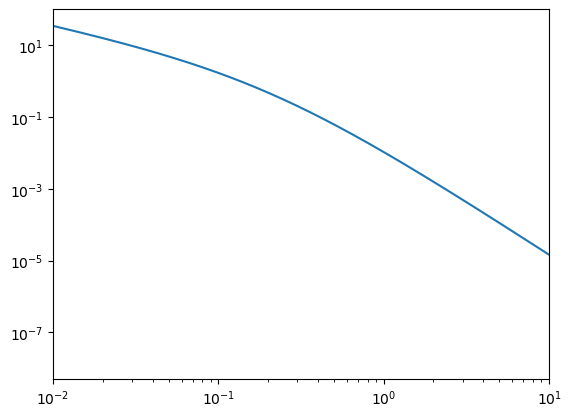

In [24]:
import numpy as np
from mcfit import Hankel
import matplotlib.pyplot as plt

# --- NFW profile in real space ---
def rho_nfw(r, rho_s, r_s):
    return rho_s / ((r/r_s)*(1 + r/r_s)**2)

# Define scale radius and rho_s for a halo
r_s = 0.2  # Mpc/h
rho_s = 1.0  # arbitrary units

for r_upper in [0, 1, 2]:
    # Radial grid
    r = np.logspace(-2, r_upper, 500)  # in Mpc/h

    # Compute rho(r)
    rho = rho_nfw(r, rho_s, r_s)

    # Normalize profile (e.g., total mass = 1)
    mass = 4*np.pi * np.trapz(rho * r**2, r)
    rho_norm = rho / mass

    # Prepare for Hankel transform
    f_r = 4*np.pi * r**2 * rho_norm  # spherical symmetry
    h = Hankel(r, lowring=True)
    uk, k = h(f_r, extrap=True)

    # Now uk ~ u(k|M), normalized so u(k=0) ≈ 1
    plt.loglog(k, uk)
plt.xlabel("k [h/Mpc]")
plt.ylabel("u(k)")
plt.xlim(1e-2, 10)
plt.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(r, rho_norm, label='Normalized NFW')
ax.set_xlim(1e-2, 10)
ax.set_xscale('log')
ax.set_yscale('log')